- Introduction.
    - Content.
    - Dataset properties.
    - Normalize data.

- Visualization.

- Model.
    - Buil Model.
    - Pretrained model + classifier.
      - VGG16.
        - LogisticRegression.
        - DecisionTreeClassifier.
        - RandomForestClassifier.
      - VGG19.
        - LogisticRegression.
        - DecisionTreeClassifier.
        - RandomForestClassifier.
      - ResNet50.
        - LogisticRegression.
        - DecisionTreeClassifier.
        - RandomForestClassifier.

      - VGG16 + GlobalAveragePooling2D +  Dense.
      - VGG19 + GlobalAveragePooling2D + Dense.
      - Resnet50 + GlobalAveragePooling2D + Dense.

- Conclusion.



# Introduction

Fruits 360 dataset: A dataset of images containing fruits and vegetables

Version: 2019.09.21.0

### Content

The following fruits and are included: Apples (different varieties: Crimson Snow, Golden, Golden-Red, Granny Smith, Pink Lady, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red, Lady Finger), Beetroot Red, Blueberry, Cactus fruit, Cantaloupe (2 varieties), Carambula, Cauliflower, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Chestnut, Clementine, Cocos, Dates, Eggplant, Ginger Root, Granadilla, Grape (Blue, Pink, White (different varieties)), Grapefruit (Pink, White), Guava, Hazelnut, Huckleberry, Kiwi, Kaki, Kohlrabi, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango (Green, Red), Mangostan, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine (Regular, Flat), Nut (Forest, Pecan), Onion (Red, White), Orange, Papaya, Passion fruit, Peach (different varieties), Pepino, Pear (different varieties, Abate, Forelle, Kaiser, Monster, Red, Williams), Pepper (Red, Green, Yellow), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum (different varieties), Pomegranate, Pomelo Sweetie, Potato (Red, Sweet, White), Quince, Rambutan, Raspberry, Redcurrant, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Tomato (different varieties, Maroon, Cherry Red, Yellow), Walnut.


### Dataset properties

Total number of images: 82213.

Training set size: 61488 images (one fruit or vegetable per image).

Test set size: 20622 images (one fruit or vegetable per image).

Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)

Number of classes: 120 (fruits and vegetables).

Image size: 100x100 pixels.

Filename format: image_index_100.jpg (e.g. 32_100.jpg) or r_image_index_100.jpg (e.g. r_32_100.jpg) or r2_image_index_100.jpg or r3_image_index_100.jpg. "r" stands for rotated fruit. "r2" means that the fruit was rotated around the 3rd axis. "100" comes from image size (100x100 pixels).

Different varieties of the same fruit (apple for instance) are stored as belonging to different classes.


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# !cp /content/drive/'My Drive'/'ML 5'/fruits.zip /content

In [0]:
# !unzip fruits.zip

In [0]:
import os

import matplotlib.pyplot as plt
import cv2
import numpy as np

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, Conv2D
from keras import optimizers
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from keras.models import model_from_json

In [0]:
dir_train = os.listdir('/content/fruits-360_dataset/fruits-360/Training')
dir_test = os.listdir('/content/fruits-360_dataset/fruits-360/Test')

In [0]:
dic = {}
for d_train in dir_train:
  dic[d_train] = 0

In [0]:
X_train = []
y_train = []
for d_train in dir_train:
  for root, dirr, files in os.walk('/content/fruits-360_dataset/fruits-360/Training' + '/' + d_train):
    for file in files:
      img = plt.imread(root + '/' + file)
      X_train.append(img)
      y_train.append(d_train)
      dic[d_train] += 1

In [0]:
X_test = []
y_test = []
for d_test in dir_test:
  for root, dirr, files in os.walk('/content/fruits-360_dataset/fruits-360/Test' + '/' + d_test):
    for file in files:
      img = plt.imread(root + '/' + file)
      X_test.append(img)
      y_test.append(d_test)

In [0]:
X_test_mul = []
y_test_mul = []
i = 0
for root, dirr, files in os.walk('/content/fruits-360_dataset/fruits-360/test-multiple_fruits'):
  for file in files:
    img = plt.imread(root + '/' + file)
    X_test_mul.append(img)
    i += 1
    y_test_mul.append(os.path.splitext(file)[0])
    # if(i == 30):
    #   break

In [0]:
print('Số sample train: ' + str(len(y_train)))
print('Số sample test: ' + str(len(y_test)))
print('Số sample mul: ' + str(len(y_test_mul)))
print('Số loại: ' + str(len(dir_train)))

Số sample train: 60498
Số sample test: 20622
Số sample mul: 106
Số loại: 120


Data train gồm 60498 ảnh thuộc 120 loại
Data test gồm 20622 ảnh thuộc 120 loại.

### Normalize data
Convert dữ liệu về khoảng 0 - 1.

Convert label về onehot encoding.

In [0]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_train = X_train / 255

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_test = X_test / 255

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

In [0]:
X_test_mul = np.asarray(X_test_mul)
X_test_mul = X_test_mul / 255

# Visualization

In [0]:
img_draw = []
label_draw = []

for d_train in dir_train:
  for root, dirr, files in os.walk('/content/fruits-360_dataset/fruits-360/Training/' + '/' + d_train):
    for file in files:
      img = plt.imread(root + '/' + file)
      img_draw.append(img)
      label_draw.append(d_train)
      break

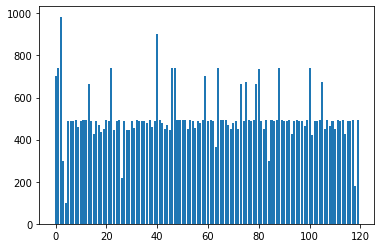

In [0]:
plt.bar(range(len(dic)), list(dic.values()), align='center')
# plt.xticks(range(len(dic)), list(dic.keys()))
plt.show()

Số lượng ảnh của các loại là tương đối cân bằng, chỉ có 1 số ít là lớn hơn hoặc nhỏ hơn vượt trội so với các loại khác.

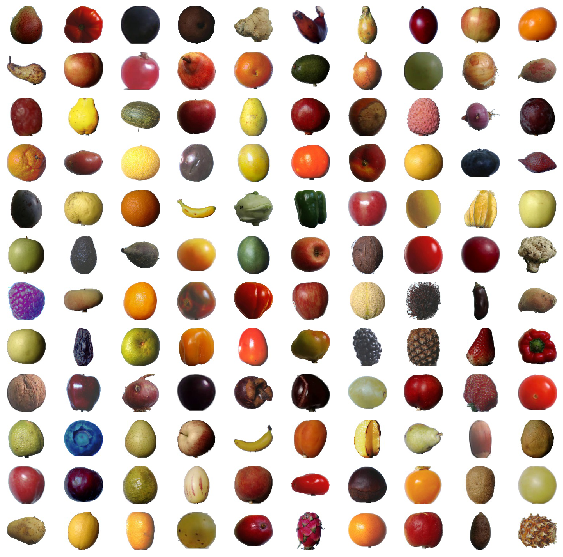

In [0]:
_, axs = plt.subplots(12, 10, figsize=(10, 10))
axs = axs.flatten()
for img, ax, lab in zip(img_draw, axs, label_draw):
    ax.imshow(img)
    ax.set_label(lab) 
    ax.axis('off')
    # ax.title.set_text(lab)
plt.show()

# Model

### Build Model

In [0]:
input_shape = X_train[0].shape

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)       

In [0]:
model.compile(optimizer=optimizers.SGD(lr=1e-3, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10)

Train on 60498 samples, validate on 20622 samples
Epoch 1/10
60498/60498 [==============================] - 43s 711us/step - loss: 1.8042 - acc: 0.4575 - val_loss: 0.9743 - val_acc: 0.6857
Epoch 2/10
60498/60498 [==============================] - 42s 702us/step - loss: 0.5470 - acc: 0.8199 - val_loss: 0.5441 - val_acc: 0.8477
Epoch 3/10
60498/60498 [==============================] - 44s 719us/step - loss: 0.2016 - acc: 0.9348 - val_loss: 0.3409 - val_acc: 0.8956
Epoch 4/10
60498/60498 [==============================] - 43s 704us/step - loss: 0.0984 - acc: 0.9680 - val_loss: 0.4749 - val_acc: 0.8791
Epoch 5/10
60498/60498 [==============================] - 43s 704us/step - loss: 0.0635 - acc: 0.9796 - val_loss: 0.2372 - val_acc: 0.9419
Epoch 6/10
60498/60498 [==============================] - 42s 702us/step - loss: 0.0425 - acc: 0.9879 - val_loss: 0.3072 - val_acc: 0.9257
Epoch 7/10
60498/60498 [==============================] - 43s 710us/step - loss: 0.0290 - acc: 0.9912 - val_loss: 0.

In [0]:
preds = model.predict(X_test)

In [0]:
predict = np.argmax(preds, axis=1)

In [0]:
print(classification_report(y_test_encoded, predict))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       164
           1       0.92      0.83      0.87       148
           2       0.98      0.99      0.99       164
           3       1.00      0.89      0.94       164
           4       0.86      1.00      0.93       161
           5       1.00      1.00      1.00       164
           6       0.83      1.00      0.90       152
           7       0.94      0.94      0.94       164
           8       0.83      0.84      0.83       164
           9       1.00      1.00      1.00       144
          10       1.00      1.00      1.00       166
          11       1.00      0.76      0.87       164
          12       1.00      1.00      1.00       219
          13       0.94      1.00      0.97       164
          14       0.90      1.00      0.95       143
          15       1.00      1.00      1.00       166
          16       0.89      0.87      0.88       166
          17       1.00    

Model cho kết quả khá tốt, đạt 97% chỉ sau 10 Epochs.

In [0]:
# label_encoder.inverse_transform(predict)

In [0]:
# # save model
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # save weights
# model.save_weights("model.h5")

In [0]:
# load model
# json_file = open('/content/drive/My Drive/ML 5/model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# load weights
# loaded_model.load_weights("/content/drive/My Drive/ML 5/model.h5")

### Test trên ảnh thực tế

In [0]:
def show_img(pathf):
  img_list = []
  i = 0
  for root, dirr, files in os.walk(pathf):
    for file in files:
      img = plt.imread(pathf + '/' + file)
      img_list.append(img)
      if ( i == 6):
        break
      i += 1

  _, axs = plt.subplots(2, 3, figsize=(10, 10))
  axs = axs.flatten()
  for img, ax in zip(img_list, axs):
      ax.imshow(img)
      ax.axis('off')
  plt.show()

In [0]:
def testt(pathf, num_label):
  img_test = []
  i = 0
  for root, dirr, files in os.walk(pathf):
    for file in files:
      img = plt.imread(pathf + '/' + file)
      img = img / 255
      img_test.append(img)
      if(i == 6):
        break
      i += 1

  _, axs = plt.subplots(2, 3, figsize=(10, 10))
  axs = axs.flatten()

  for img_t, ax in zip(img_test, axs):
    img_t = cv2.resize(img_t, (100, 100))
    preds = loaded_model.predict(np.expand_dims(img_t, axis=0))
    if(num_label == 1):
      predict = np.argmax(preds, axis=1)
      ax.text(2, 10, label_encoder.inverse_transform(predict))
      ax.imshow(img_t)
      ax.axis('off')
    else:
      preds = np.squeeze(preds)
      idxs = np.argsort(preds)[::-1][:num_label]
      y_text = 10 
      for lb in idxs:
        lb = np.asarray(lb)
        lb = lb.reshape((1,))
        label_text = "{}: {:.2f}%".format(label_encoder.inverse_transform(lb), preds[np.squeeze(lb)]*100)
        ax.text(2, y_text, label_text,color='white')
        y_text += 10
      ax.imshow(img_t)
      ax.axis('off')

#### This is formatted as code

Ảnh chứa 1 loại vật thế.

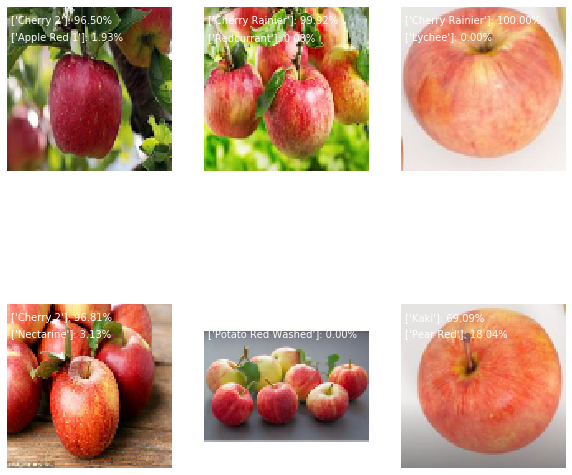

In [195]:
testt('/content/apple-red', 2)

Kết quả không tốt khi test với ảnh thực.

#### Ảnh chứa nhiều loại.

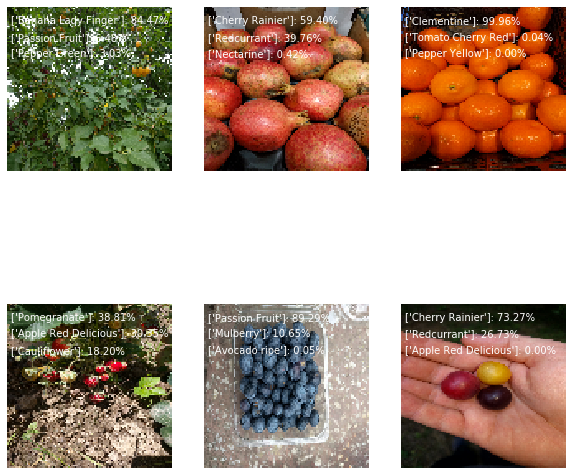

In [196]:
testt('/content/fruits-360_dataset/fruits-360/test-multiple_fruits', 3)

Kiểm tra với ảnh thực tế cho kết quả không tốt.

#### So sánh với ảnh train.

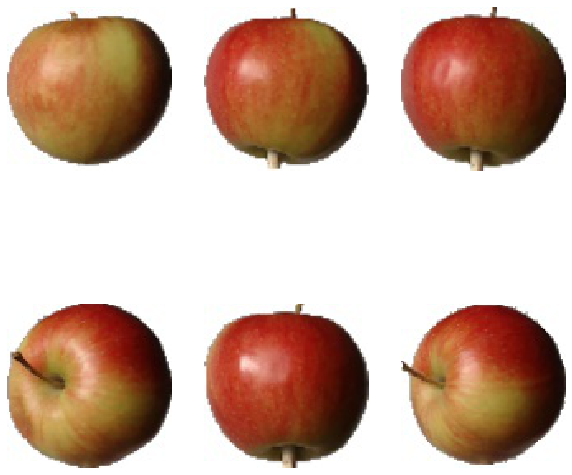

In [109]:
show_img('/content/fruits-360_dataset/fruits-360/Training/Apple Red 2')

Ảnh thực tế và ảnh train rất khác biệt nhau:
  - Ảnh train có số lượng ảnh hạn chế, chỉ chứa 1 vài hình cụ thể và chụp với góc độ khác nhau, có duy nhất một loại và chiến hầu hết diện tích bức ảnh, đã được loại bỏ nền thực tế, thay vào đó là nền trắng.
  - Ảnh test thực tế, kích thước vật nhỏ so với toàn bộ bức ảnh, màu sắc cũng rất phong phú. Do đó kết quả test train ảnh thực tế không tốt.

---> Cần tăng data giống với thực tế hơn: 
  - Đa dạng về màu sắc.
  - Đặt trong background thực.
  - Đa dạng kích thước của vật.
  - Để nhận biết nhiều vật trong 1 bức hình cần tăng kích thước ảnh train.



## Pretrained model + classifier

### VGG16

In [0]:
model_vgg16 = VGG16(include_top=False, weights='imagenet', input_shape =(100, 100, 3), pooling='avg')

In [0]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [0]:
train_vgg16 = model_vgg16.predict(X_train, batch_size=32, verbose=1)
valid_vgg16 = model_vgg16.predict(X_test, batch_size=32, verbose=1)

20622/20622 [==============================] - 14s 696us/step


#### LogisticRegression

In [0]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [0]:
logreg.fit(train_vgg16, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
valid_preds = logreg.predict(valid_vgg16)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.95      0.88      0.91       164
 Apple Crimson Snow       0.74      0.64      0.69       148
     Apple Golden 1       0.89      0.98      0.93       164
     Apple Golden 2       0.97      0.94      0.96       164
     Apple Golden 3       0.61      0.67      0.64       161
 Apple Granny Smith       0.83      0.71      0.76       164
    Apple Pink Lady       0.64      1.00      0.78       152
        Apple Red 1       0.85      0.99      0.92       164
        Apple Red 2       0.88      0.79      0.84       164
        Apple Red 3       0.99      0.97      0.98       144
Apple Red Delicious       0.97      1.00      0.98       166
 Apple Red Yellow 1       0.98      0.88      0.93       164
 Apple Red Yellow 2       0.92      0.99      0.95       219
            Apricot       0.92      0.82      0.87       164
            Avocado       0.84      0.73      0.78       143
       Avocado ripe    

VGG16 kết hợp với LogisticRegression cho kết quả khá tốt.

#### DecisionTreeClassifier

In [0]:
decision_tree = DecisionTreeClassifier()

In [0]:
decision_tree.fit(train_vgg16, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
valid_preds = decision_tree.predict(valid_vgg16)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.43      0.52      0.48       164
 Apple Crimson Snow       0.50      0.52      0.51       148
     Apple Golden 1       0.56      0.41      0.47       164
     Apple Golden 2       0.66      0.79      0.72       164
     Apple Golden 3       0.43      0.34      0.38       161
 Apple Granny Smith       0.65      0.61      0.63       164
    Apple Pink Lady       0.57      0.64      0.60       152
        Apple Red 1       0.58      0.51      0.54       164
        Apple Red 2       0.48      0.54      0.50       164
        Apple Red 3       0.50      0.49      0.49       144
Apple Red Delicious       0.59      0.64      0.61       166
 Apple Red Yellow 1       0.38      0.32      0.35       164
 Apple Red Yellow 2       0.57      0.65      0.61       219
            Apricot       0.78      0.68      0.73       164
            Avocado       0.44      0.57      0.50       143
       Avocado ripe    

DecisionTree cho kết quả kém hơn với Logisticregression khi kết hợp với VGG16.

#### RandomForestClassifier

In [0]:
random_forest = RandomForestClassifier()
random_forest.fit(train_vgg16, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
valid_preds = random_forest.predict(valid_vgg16)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.48      0.80      0.60       164
 Apple Crimson Snow       0.58      0.74      0.65       148
     Apple Golden 1       0.70      0.91      0.79       164
     Apple Golden 2       0.62      0.80      0.70       164
     Apple Golden 3       0.50      0.63      0.56       161
 Apple Granny Smith       0.74      0.69      0.71       164
    Apple Pink Lady       0.63      0.66      0.65       152
        Apple Red 1       0.72      0.76      0.74       164
        Apple Red 2       0.61      0.73      0.67       164
        Apple Red 3       0.80      0.85      0.82       144
Apple Red Delicious       0.76      0.96      0.85       166
 Apple Red Yellow 1       0.81      0.82      0.81       164
 Apple Red Yellow 2       0.71      0.95      0.81       219
            Apricot       0.74      0.69      0.72       164
            Avocado       0.69      0.88      0.78       143
       Avocado ripe    

RandomForest cho kết quả tốt hơn DecisionTree, không tốt bằng LogisticRegression.

### VGG19

In [0]:
model_vgg19 = VGG19(include_top=False, weights='imagenet', input_shape =(100, 100, 3), pooling='avg')

In [0]:
train_vgg19 = model_vgg19.predict(X_train, batch_size=32, verbose=1)
valid_vgg19 = model_vgg19.predict(X_test, batch_size=32, verbose=1)

20622/20622 [==============================] - 17s 806us/step


#### LogisticRegression

In [0]:
logreg.fit(train_vgg19, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
valid_preds = logreg.predict(valid_vgg19)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.77      0.90      0.83       164
 Apple Crimson Snow       0.78      0.48      0.59       148
     Apple Golden 1       0.98      0.98      0.98       164
     Apple Golden 2       1.00      0.94      0.97       164
     Apple Golden 3       0.87      0.64      0.74       161
 Apple Granny Smith       0.74      1.00      0.85       164
    Apple Pink Lady       0.68      1.00      0.81       152
        Apple Red 1       0.87      1.00      0.93       164
        Apple Red 2       0.79      0.80      0.80       164
        Apple Red 3       0.99      0.97      0.98       144
Apple Red Delicious       0.83      1.00      0.91       166
 Apple Red Yellow 1       0.71      0.70      0.71       164
 Apple Red Yellow 2       0.96      1.00      0.98       219
            Apricot       1.00      0.66      0.79       164
            Avocado       0.63      0.97      0.77       143
       Avocado ripe    

VGG19 kết hợp với LogisticRegression cho kết quả tương đối tốt, kém 1, 2% độ chính xác so với VGG16.

#### DecisionTreeClassifier

In [0]:
decision_tree.fit(train_vgg19, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
decision_tree.fit(train_vgg19, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
valid_preds = decision_tree.predict(valid_vgg19)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.61      0.45      0.52       164
 Apple Crimson Snow       0.36      0.38      0.37       148
     Apple Golden 1       0.49      0.49      0.49       164
     Apple Golden 2       0.87      0.62      0.72       164
     Apple Golden 3       0.47      0.57      0.52       161
 Apple Granny Smith       0.51      0.58      0.54       164
    Apple Pink Lady       0.56      0.59      0.58       152
        Apple Red 1       0.45      0.33      0.38       164
        Apple Red 2       0.58      0.66      0.62       164
        Apple Red 3       0.48      0.56      0.52       144
Apple Red Delicious       0.48      0.80      0.60       166
 Apple Red Yellow 1       0.48      0.43      0.45       164
 Apple Red Yellow 2       0.52      0.72      0.60       219
            Apricot       0.50      0.32      0.39       164
            Avocado       0.44      0.72      0.55       143
       Avocado ripe    

VGG19 kết hợp với DecisionTree cho kết quả không tốt.

#### RandomForestClassifier

In [0]:
random_forest.fit(train_vgg19, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
random_forest.fit(train_vgg19, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
valid_preds = random_forest.predict(valid_vgg19)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.52      0.71      0.60       164
 Apple Crimson Snow       0.66      0.82      0.73       148
     Apple Golden 1       0.64      0.79      0.71       164
     Apple Golden 2       0.77      0.95      0.85       164
     Apple Golden 3       0.64      0.73      0.68       161
 Apple Granny Smith       0.78      0.75      0.77       164
    Apple Pink Lady       0.58      0.67      0.62       152
        Apple Red 1       0.58      0.71      0.64       164
        Apple Red 2       0.62      0.79      0.70       164
        Apple Red 3       0.69      0.89      0.78       144
Apple Red Delicious       0.73      0.93      0.82       166
 Apple Red Yellow 1       0.70      0.73      0.72       164
 Apple Red Yellow 2       0.82      0.97      0.89       219
            Apricot       0.85      0.78      0.81       164
            Avocado       0.71      0.91      0.80       143
       Avocado ripe    

VGG19 kết hợp với RandomForest cho kết quả khá tốt, tốt hơn DecisionTree nhưng vẫn thấp hơn LogisticRegression.

### ResNet50

In [0]:
model_resnet = ResNet50(include_top=False, weights='imagenet', input_shape =(100, 100, 3), pooling='avg')

In [0]:
train_resnet = model_resnet.predict(X_train, verbose=1)
valid_resnet = model_resnet.predict(X_test, verbose=1)

20622/20622 [==============================] - 19s 901us/step


#### LogisticRegression

In [0]:
logreg.fit(train_resnet, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
valid_preds = logreg.predict(valid_resnet)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.63      0.54      0.58       164
 Apple Crimson Snow       0.37      0.68      0.48       148
     Apple Golden 1       0.43      0.45      0.44       164
     Apple Golden 2       0.83      0.57      0.67       164
     Apple Golden 3       0.47      0.71      0.56       161
 Apple Granny Smith       0.83      0.35      0.49       164
    Apple Pink Lady       0.51      0.86      0.64       152
        Apple Red 1       0.89      0.34      0.49       164
        Apple Red 2       0.66      0.30      0.42       164
        Apple Red 3       0.84      0.57      0.68       144
Apple Red Delicious       0.64      0.48      0.55       166
 Apple Red Yellow 1       0.58      0.46      0.51       164
 Apple Red Yellow 2       0.70      0.58      0.63       219
            Apricot       0.21      0.20      0.20       164
            Avocado       0.53      0.51      0.52       143
       Avocado ripe    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Resnet50 với LogisticRegression cho kết quả không tốt, thấp hơn rất nhiều VGG16 và VGG19.

#### DecisionTreeClassifier

In [0]:
decision_tree.fit(train_resnet, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
valid_preds = decision_tree.predict(valid_resnet)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.83      0.62      0.71       164
 Apple Crimson Snow       0.63      0.61      0.62       148
     Apple Golden 1       0.66      0.41      0.51       164
     Apple Golden 2       0.81      0.69      0.75       164
     Apple Golden 3       0.72      0.86      0.78       161
 Apple Granny Smith       0.80      0.73      0.76       164
    Apple Pink Lady       0.52      0.62      0.57       152
        Apple Red 1       0.64      0.44      0.52       164
        Apple Red 2       0.58      0.67      0.62       164
        Apple Red 3       0.62      0.50      0.55       144
Apple Red Delicious       0.58      0.67      0.62       166
 Apple Red Yellow 1       0.45      0.41      0.43       164
 Apple Red Yellow 2       0.69      0.64      0.66       219
            Apricot       0.52      0.45      0.48       164
            Avocado       0.59      0.77      0.67       143
       Avocado ripe    

DecisionTree cho kết quả tốt hơn với LogisticRegression.

#### RandomForestClassifier

In [0]:
random_forest.fit(train_resnet, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
valid_preds = random_forest.predict(valid_resnet)

In [0]:
print(classification_report(y_test, valid_preds))

                     precision    recall  f1-score   support

     Apple Braeburn       0.73      0.70      0.71       164
 Apple Crimson Snow       0.68      0.89      0.77       148
     Apple Golden 1       0.64      0.59      0.62       164
     Apple Golden 2       0.81      0.87      0.84       164
     Apple Golden 3       0.64      0.96      0.77       161
 Apple Granny Smith       0.78      0.80      0.79       164
    Apple Pink Lady       0.56      0.84      0.67       152
        Apple Red 1       0.72      0.52      0.61       164
        Apple Red 2       0.74      0.63      0.68       164
        Apple Red 3       0.66      0.67      0.66       144
Apple Red Delicious       0.73      0.89      0.80       166
 Apple Red Yellow 1       0.81      0.88      0.85       164
 Apple Red Yellow 2       0.68      0.96      0.79       219
            Apricot       0.69      0.71      0.70       164
            Avocado       0.72      0.83      0.77       143
       Avocado ripe    

ResNet50 đạt kết quả tốt nhất khi kết hợp với RandomForest, đạt trên 80%.

### VGG16 + Dense

In [0]:
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape =(100, 100, 3))

In [0]:
model = Sequential()
model.add(vgg16)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(120, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 120)               30840     
Total params: 14,876,856
Trainable params: 14,876,856
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=5)

Train on 60498 samples, validate on 20622 samples
Epoch 1/5
60498/60498 [==============================] - 144s 2ms/step - loss: 1.6065 - acc: 0.6537 - val_loss: 0.1717 - val_acc: 0.9504
Epoch 2/5
60498/60498 [==============================] - 136s 2ms/step - loss: 0.0142 - acc: 0.9966 - val_loss: 0.1916 - val_acc: 0.9514
Epoch 3/5
60498/60498 [==============================] - 135s 2ms/step - loss: 0.0044 - acc: 0.9991 - val_loss: 0.0828 - val_acc: 0.9764
Epoch 4/5
60498/60498 [==============================] - 135s 2ms/step - loss: 6.4094e-04 - acc: 1.0000 - val_loss: 0.0939 - val_acc: 0.9729
Epoch 5/5
60498/60498 [==============================] - 135s 2ms/step - loss: 1.8764e-04 - acc: 1.0000 - val_loss: 0.0759 - val_acc: 0.9759


VGG16 đạt kết quả khá tốt, ngay epoch đầu tiên đã được 95%, đến epoch thứ 3 đạt được 97%. 

### VGG19 + Dense

In [0]:
vgg19 = VGG19(weights='imagenet', include_top=False)
model = Sequential()
model.add(vgg19)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(120, activation='softmax'))

In [0]:
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, None, None, 512)   20024384  
_________________________________________________________________
global_average_pooling2d_12  (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 120)               30840     
Total params: 20,186,552
Trainable params: 20,186,552
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=5)

Train on 60498 samples, validate on 20622 samples
Epoch 1/5
60498/60498 [==============================] - 168s 3ms/step - loss: 1.4146 - acc: 0.6943 - val_loss: 0.1968 - val_acc: 0.9453
Epoch 2/5
60498/60498 [==============================] - 159s 3ms/step - loss: 0.0127 - acc: 0.9970 - val_loss: 0.0790 - val_acc: 0.9747
Epoch 3/5
60498/60498 [==============================] - 160s 3ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 0.0594 - val_acc: 0.9827
Epoch 4/5
60498/60498 [==============================] - 161s 3ms/step - loss: 1.5487e-04 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 0.9824
Epoch 5/5
60498/60498 [==============================] - 162s 3ms/step - loss: 6.8430e-05 - acc: 1.0000 - val_loss: 0.0614 - val_acc: 0.9823


VGG19 cho kết quả cũng rất tốt, 98% sau epoch thứ 3.

### Resnet50 + Dense

In [0]:
resnet = ResNet50(weights='imagenet', include_top=False)
model = Sequential()
model.add(resnet)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(120, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_11  (None, 2048)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_24 (Dense)             (None, 120)               30840     
Total params: 24,143,096
Trainable params: 24,089,976
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=5)

Train on 60498 samples, validate on 20622 samples
Epoch 1/5
60498/60498 [==============================] - 205s 3ms/step - loss: 1.5223 - acc: 0.7588 - val_loss: 0.2275 - val_acc: 0.9600
Epoch 2/5
60498/60498 [==============================] - 187s 3ms/step - loss: 0.0818 - acc: 0.9962 - val_loss: 0.0889 - val_acc: 0.9818
Epoch 3/5
60498/60498 [==============================] - 188s 3ms/step - loss: 0.0310 - acc: 0.9992 - val_loss: 0.0594 - val_acc: 0.9858
Epoch 4/5
60498/60498 [==============================] - 187s 3ms/step - loss: 0.0189 - acc: 0.9997 - val_loss: 0.0496 - val_acc: 0.9879
Epoch 5/5
60498/60498 [==============================] - 188s 3ms/step - loss: 0.0138 - acc: 0.9996 - val_loss: 0.0414 - val_acc: 0.9901


Resnet50 đạt khá tốt, 98% sau epoch thứ 2.

# Conclusion

Chỉ với 8 layer, model đạt kết quả khá tốt tới 97%.

VGG16 kết hợp với LogisticRegression cho kết quả tốt nhất(92% - 93%), tiếp theo là VGG19 kết hơp với LogisticRegression(90% - 91%).

ResNet50 cho kết quả không được tốt bằng VGG16 và VGG19, kết quả tốt nhất là ResNet50 + RandomForest đạt hơn 80 %.

Cả 3 sau khi thêm GlobalAveragePooling2D và 2 layer Dense đều cho kết quả rất tốt, trên 97% chỉ sau 3 epochs.

Sử dụng pretrained model cộng thêm một số layer khác sẽ cho kết quả tốt hơn khi sử dụng 1 classifier.